In [ ]:
# requests for rewuests
# and beautiful soup for fetching data from static pages
# for JS based dynamic pages use selenium.

In [339]:
import matplotlib.pyplot as plt

In [74]:
import requests

webpage = 'https://www.99acres.com/rent-flats-in-delhi-ncr-ffid'
webpage_1 = 'https://housing.com/rent/search-P6xfqdsey6cc3d95h?listingId=4663649'

In [111]:
# The webpage only returns 30 items at a time, need to scroll the page, have to use selenium for that.
# alternatively just scroll a thousand listings and then download the page ?

#### Using Selenium to scroll the page
This works but all data in a single string.

In [124]:
import time
import os

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

PROJECT_ROOT = os.path.abspath(os.path.abspath(''))
DRIVER_BIN = os.path.join(PROJECT_ROOT, "driver/chromedriver")

browser = webdriver.Chrome(executable_path = DRIVER_BIN)

browser.get(webpage_1)
time.sleep(1)

elem = browser.find_element_by_tag_name("body")

no_of_pagedowns = 2 # loads about 860 elements

while no_of_pagedowns:
    elem.send_keys(Keys.PAGE_DOWN)
    time.sleep(.2)
    no_of_pagedowns-=1

post_elems = browser.find_elements_by_class_name("css-19v6osn")

In [101]:
len(post_elems)

1

In [136]:
store = {}

for i,post in enumerate(post_elems):
    store[i] = post.text

### Cleaning this Text

In [142]:
post.text

"8,000\n1 BHK Independent Floor\nSemi Furnished500 sq.ft\nDREAM HOME OFFER Good location SEMI furnished and newly build up floor all facilities are available like caretaker, water And electricity 24/7 . Shari...\nSA\nSaurabh Aggarwal\nHousing Prime Agent\nContact\n10,000\n1 RK Independent Floor\nWest Patel Nagar, Patel Nagar,New Delhi\nFully Furnished450 sq.ft\nCity's best Independent Floor is now on rent. Affordable 1 BHK available for rent. Property for rent available. Contact for Fully Furnished property. ...\nMP\nMEHAR Properties\nHousing Prime Agent\nContact\n16,000\n1 BHK Independent Floor\nWest Patel Nagar, Patel Nagar,New Delhi\nFully Furnished450 sq.ft\nThis well-built,sprawing Fully Furnished property can be yours. Spacious 1 BHK Independent Floor is available for rent. Properties on rent in Delhi, ...\nMP\nMEHAR Properties\nHousing Prime Agent\nContact\n13,000\n1 RK Independent Floor\nWest Patel Nagar, Patel Nagar,New Delhi\nFully Furnished450 sq.ft\nFind an affordable Fully

In [146]:
# 9 columns for each entry
split_text = post.text.split('\n')

In [157]:
split_text[8]

'10,000'

In [175]:
for i, item in enumerate(split_text):
    print(i, item)

0 8,000
1 1 BHK Independent Floor
2 Semi Furnished500 sq.ft
3 DREAM HOME OFFER Good location SEMI furnished and newly build up floor all facilities are available like caretaker, water And electricity 24/7 . Shari...
4 SA
5 Saurabh Aggarwal
6 Housing Prime Agent
7 Contact
8 10,000
9 1 RK Independent Floor
10 West Patel Nagar, Patel Nagar,New Delhi
11 Fully Furnished450 sq.ft
12 City's best Independent Floor is now on rent. Affordable 1 BHK available for rent. Property for rent available. Contact for Fully Furnished property. ...
13 MP
14 MEHAR Properties
15 Housing Prime Agent
16 Contact
17 16,000
18 1 BHK Independent Floor
19 West Patel Nagar, Patel Nagar,New Delhi
20 Fully Furnished450 sq.ft
21 This well-built,sprawing Fully Furnished property can be yours. Spacious 1 BHK Independent Floor is available for rent. Properties on rent in Delhi, ...
22 MP
23 MEHAR Properties
24 Housing Prime Agent
25 Contact
26 13,000
27 1 RK Independent Floor
28 West Patel Nagar, Patel Nagar,New Delhi
29 

In [172]:
# this wouldn't work as the number of rows is not standardised.'\n' 
n = 8
[split_text[i:i + n] for i in range(0, len(split_text), n)]

[['8,000',
  '1 BHK Independent Floor',
  'Semi Furnished500 sq.ft',
  'DREAM HOME OFFER Good location SEMI furnished and newly build up floor all facilities are available like caretaker, water And electricity 24/7 . Shari...',
  'SA',
  'Saurabh Aggarwal',
  'Housing Prime Agent',
  'Contact'],
 ['10,000',
  '1 RK Independent Floor',
  'West Patel Nagar, Patel Nagar,New Delhi',
  'Fully Furnished450 sq.ft',
  "City's best Independent Floor is now on rent. Affordable 1 BHK available for rent. Property for rent available. Contact for Fully Furnished property. ...",
  'MP',
  'MEHAR Properties',
  'Housing Prime Agent'],
 ['Contact',
  '16,000',
  '1 BHK Independent Floor',
  'West Patel Nagar, Patel Nagar,New Delhi',
  'Fully Furnished450 sq.ft',
  'This well-built,sprawing Fully Furnished property can be yours. Spacious 1 BHK Independent Floor is available for rent. Properties on rent in Delhi, ...',
  'MP',
  'MEHAR Properties'],
 ['Housing Prime Agent',
  'Contact',
  '13,000',
  '1 

In [173]:
## Another method - split with regex when atleast 4 cont. numbers for price, but could be true for size too.

#### Static page approach

In [29]:
# fetch the webpage

page = requests.get(webpage_1)

# returns a response object. 

print(page.status_code)

from bs4 import BeautifulSoup
# Beautiful Soup can be used to extract information from HTML pagess, downloaded ones too

# send HTML content of page to BeautifulSoup object, invoke html parser

soup = BeautifulSoup(page.content, 'html.parser')

200


In [62]:
# saved source code
# print(soup.prettify())

# we can move through the page one level at a time, using children property of soup, returns list
# Could have used something like beatiful soup.fina_all() for each listing

# in the html of the page, find all the bins with <li> and class:
# house_data = html_soup.find_all('li', class_="search-list__item search-list__item--listing")

#print(list(soup.children)[1])

[type(item) for item in list(soup.children)]


[bs4.element.Doctype, bs4.element.Tag]

In [33]:

# saving this to html_lang

html_lang = list(soup.children)[1]

body_page = list(html_lang.children)[1]

#### Extracting the desired div
Using body tag as a refrence point. <br>
body[0][0][2][1][2]

In [51]:
level_1 = list(body_page.children)[0]

level_2 = list(level_1.children)[1]

level_3 = list(list((list(level_2.children)[2]).children)[1].children)[2]

In [58]:
# Thats it, these are the listings.

# Store this data in a dictionary

listings = {}

for key, item in enumerate(list(level_3.children)):
    listings[key] = item

In [121]:
# so, we have 30 listings, need atleast a 1000.
listings[0].prettify()

'<article class="css-1kk5az4" data-listingid="4663649" id="srp-0">\n <div class="css-xovbnn">\n  <div class="css-1p99d2q">\n   <img class="img css-br386n" src="//c.housingcdn.com/s/assets/property-fallback.6d3e2abe.png"/>\n  </div>\n  <div class="css-194z77h">\n   <div data-q="result-data">\n    <div class="css-12221nt">\n     <div class="css-1g4x5kn">\n      <span class="shortlistIcon css-17qnvkx" data-q="shortlist-false">\n      </span>\n     </div>\n    </div>\n    <div class="css-1rbm4ry" data-q="price">\n     <span class="rupee-icon css-1i4zbuc">\n     </span>\n     8,000\n    </div>\n    <a class="css-dk6esa" data-q="title" href="/rent/4663649-500-sqft-1-bhk-independent-floor-on-rent-in-chhatarpur-delhi">\n     1 BHK Independent Floor\n    </a>\n    <div class="css-i7cf4s" data-q="address">\n    </div>\n    <div class="css-10v2eo1" data-q="features">\n     <span class="css-wze9ea">\n      Semi Furnished\n     </span>\n     <span class="css-wze9ea">\n      500 sq.ft\n     </span>\

## Makaan.com website. 
makaan.com - Has props for rent in different parts of Delhi, Get script working on one, upto getting cleanish data
Then do for all areas of delhi and clean.<br>
OH MY GOD - THE SCRIPT WORKS FETCHING LOTS OF DATA

In [ ]:
# from makaan.com Their source code has their config file 

{"selector":"listing_10051927","sellerType":"AGENT",
 "companyType":"AGENT","companyId":2068867,"companyUserId":17937939,
 "backgroundColor":"#dde2ed","textColor":"#fff","nameText":"S",
 "companyName":"Smart Homes","companyRating":4.3,
 "verificationDate":1588444200000,"serverTime":1591379468463,
 "listingUrl":"https://www.makaan.com/delhi/builder-project-in-sainik-farms-10051927/2bhk-3t-1500-sqft-independenthouse-for-rent",
 "imageUrl":"https://static.makaan.com/17/0/572/31067456.jpeg?width=460&amp;height=260"
 ,"id":10051927,"propertyId":10581254,"projectId":1187264,"projectName":"Project",
 "projectStatus":"Ready to move","mainImageId":"","imageCount":0,"latitude":28.50962448,"longitude":77.19683838
 ,"localityName":"Sainik Farms","suburbName":"Delhi South","cityName":"Delhi"
 ,"localityUrl":"https://www.makaan.com/delhi/sainik-farms-real-estate-53815"
 ,"rank":7,"price":35000,"unitTypeId":19,"propertyType":"Independent House","bedrooms":2
 ,"isPlot":false,"isApartment":false,"localityId":53815,"suburbId":10022,"cityId":6
 ,"listingScore":4.18182,"listingCategory":"Rental","isCommercial":""
 ,"size":"1,500 sq ft","isRk":false,"isPentHouse":false,"isStudio":false,"defaultImageId":""
 ,"sellerCallRatingCount":0,"sellerCompanyFeedbackCount":0,"isAccountLocked":false
 ,"isPaidSeller":false,"sellerTransactionStatus":{"isExpertDealMaker":false
                                                  ,"isDealMaker":false,"typeLabel":""}
 ,"isOriginalSearchResult":true,"isMakaanSelectSeller":false,"mainImageWidth":584,"mainImageHeight":330
 ,"leadType":"paid","reraInfo":"N/A","isMPMatchTagListing":"false","listingDomain":"housing"}

In [1]:
import json
import pandas as pd

In [306]:
# Problem - Fetches ads too

def fetch_listings(webpage, num_pages = 1):
    """ Takes in the makaan.com URL and fetches the 
    listings for the number of pages specified.
    Returns the list of json of all listings.
    """
    listings = []
    json_list = []
    
    for i in range(1, num_pages+1):
        
        # Url for the page
        url = webpage.split('?')[0] + '?page=' + str(i)
        # fetching page and contents
        page = requests.get(url)
        content = BeautifulSoup(page.content, 'html.parser')
        # find list of listing - 21 listings per page
        house_data = content.find_all('li', class_="cardholder")
        listings.extend(list(house_data))
        
    for i in range(len(listings)):
        json_list.append(list(listings)[i].find_all('script', {"type":"text/x-config"})[0].text)
    return json_list

In [259]:
# Function that parses the JSON and creates a DF with the data and for columns 'size', 'propertyType',"bedrooms",
#'latitude', 'longitude', 'localityName', 'suburbName', 'cityName', 'price', 'companyName'

def remove_adds(list_json):
    """ Takes in the list of JSON and returns list of JSON without Adds.
    """
    clean_json = []
    
    # iterate over list of json

    for i in range(len(list_json)):
        temp = json.loads(list_json[i])
        key = list(temp.keys())[0]
        if key == 'selector':
            clean_json.append(temp)
    
    return clean_json

In [359]:
def json_to_df(list_json):
    """ Takes in the list of JSON and creates a DF.
    Returns DF with each listing as a row and the columns - 'size', 'propertyType',"bedrooms",
    'latitude', 'longitude', 'localityName', 'suburbName', 'cityName', 'price', 'companyName'
    """
    # create a dataframe 
    data = pd.DataFrame(columns=['size', 'propertyType',"bedrooms",
    'latitude', 'longitude', 'localityName', 'suburbName', 'cityName', 'price', 'companyName'])
    
    # iterate over JSON
    for i in range(len(list_json)):
        temp = list_json[i]
        try:
            data.loc[i] = [temp['size'], temp['propertyType'],temp['bedrooms'],
                           temp['latitude'], temp['longitude'],temp['localityName']
                           ,temp['suburbName'], temp['cityName'], temp['price'], temp['companyName']]
        except KeyError : 
            pass
        
    return data

In [349]:
# east delhi
webpage_east = 'https://www.makaan.com/delhi/delhi-east-flats-for-rent-10019?page=1'
east_delhi = fetch_listings(webpage_east, num_pages=100)
clean_east_delhi = remove_adds(east_delhi)
east_delhi_df = json_to_df(clean_east_delhi)

In [352]:
# rohini
webpage_rohini = 'https://www.makaan.com/delhi/rohini-flats-for-rent-11606?page=1'
rohini = fetch_listings(webpage_rohini, num_pages=100)
clean_rohini = remove_adds(rohini)
rohini_df = json_to_df(clean_rohini)

In [353]:
# south delhi 

webpage_south = 'https://www.makaan.com/delhi/delhi-south-flats-for-rent-10022?page=1'
south = fetch_listings(webpage_south, num_pages=100)
clean_south = remove_adds(south)
south_df = json_to_df(clean_south)

In [354]:
# West Delhi 

webpage_west = 'https://www.makaan.com/delhi/west-delhi-flats-for-rent-10176?page=1'
west = fetch_listings(webpage_west, num_pages=100)
clean_west = remove_adds(west)
west_df = json_to_df(clean_west)

In [367]:
# north delhi - has fewer entries - 1329, have to make do
webpage_north = 'https://www.makaan.com/delhi/north-delhi-flats-for-rent-10177?page=1'
north = fetch_listings(webpage_north, num_pages=150)
clean_north = remove_adds(north)
north_df = json_to_df(clean_north)

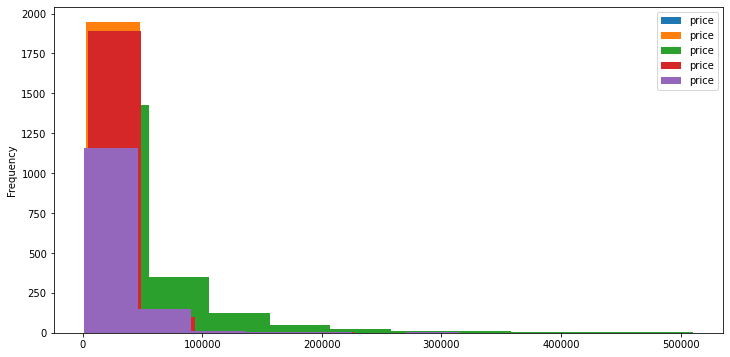

In [363]:
plt.figure(figsize=(12,6))
rohini_df.price.astype(int).plot(kind = 'hist')
east_delhi_df.price.astype(int).plot(kind = 'hist')
south_df.price.astype(int).plot(kind = 'hist')
west_df.price.astype(int).plot(kind = 'hist')
north_df.price.astype(int).plot(kind = 'hist')
plt.legend()
plt.show()

In [365]:
rent_data = pd.concat([east_delhi_df, rohini_df, south_df, west_df, north_df], axis = 0)

In [369]:
rent_data.to_csv('Rent_data_makaan.csv')

In [370]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7622 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   size          7622 non-null   object 
 1   propertyType  7622 non-null   object 
 2   bedrooms      7622 non-null   object 
 3   latitude      7622 non-null   float64
 4   longitude     7622 non-null   float64
 5   localityName  7622 non-null   object 
 6   suburbName    7622 non-null   object 
 7   cityName      7622 non-null   object 
 8   price         7622 non-null   object 
 9   companyName   7622 non-null   object 
dtypes: float64(2), object(8)
memory usage: 655.0+ KB


In [2]:
import seaborn as sns

In [3]:
rent_data= pd.read_csv('Rent_data_makaan.csv')

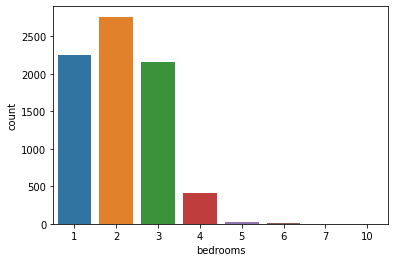

In [5]:
sns.countplot(x = 'bedrooms', data = rent_data)

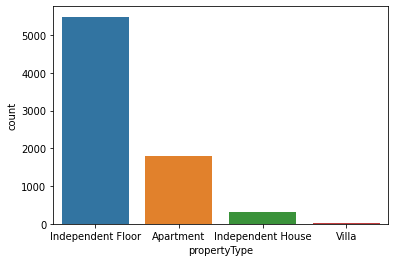

In [6]:
sns.countplot(x = 'propertyType', data = rent_data)

In [16]:
# rent size in square feet
rent_data.assign[['size', 'sz_unit1', 'sz_uni2']] = rent_data['size'].str.split(' ')

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [25]:
# agents/companies with greater than 5 listings
rent_data.companyName.value_counts()[rent_data.companyName.value_counts() > 10]

Jagdamba Associates                     248
Arora Associates                        238
Guru kipra properties                   161
Sky Properties                          148
Prince Associates                       148
                                       ... 
SHREE KRISHNA PROPERTIES                 12
Shubham Home Solutions                   12
Individual Agent                         11
rajesh garg luxmi property pitampura     11
Dream house properties                   11
Name: companyName, Length: 137, dtype: int64

In [22]:
rent_data.localityName.value_counts()

Paschim Vihar          868
Pitampura              628
mayur vihar phase 1    591
New Ashok Nagar        441
Uttam Nagar            337
                      ... 
Yamuna Vihar             1
Ganesh Nagar             1
Meera Bagh               1
param puri               1
Mukhram Garden           1
Name: localityName, Length: 160, dtype: int64

In [4]:
import requests

#fetch the webpage

page = requests.get(webpage_3)

# returns a response object. 

print(page.status_code)

from bs4 import BeautifulSoup
# Beautiful Soup can be used to extract information from HTML pagess, downloaded ones too

# send HTML content of page to BeautifulSoup object, invoke html parser

soup = BeautifulSoup(page.content, 'html.parser')

200


In [25]:
# Alternatively find list of listings 

house_data = soup.find_all('li', class_="cardholder")

In [34]:
len(house_data)

21

In [147]:
list(house_data)[20].find_all('script', {"type":"text/x-config"})[0].text

'{"selector":"listing_9815613","sellerType":"AGENT","companyType":"AGENT","companyId":2220534,"companyUserId":18478407,"backgroundColor":"#dfeddd","textColor":"#fff","nameText":"N","companyName":"Nestaway Technologies Pvt Ltd","companyRating":0,"verificationDate":1584383400000,"serverTime":1591385342733,"listingUrl":"https://www.makaan.com/delhi/builder-project-in-mandawali-9815613/2bhk-1t-800-sqft-independenthouse-for-rent","imageUrl":"https://static.makaan.com/17/9815613/283/44631912.jpeg?width=460&amp;height=260","id":9815613,"propertyId":10787183,"projectId":752815,"projectName":"Project","projectStatus":"Ready to move","mainImageId":"","imageCount":2,"latitude":28.62464523,"longitude":77.29869843,"localityName":"Mandawali","suburbName":"Delhi East","cityName":"Delhi","localityUrl":"https://www.makaan.com/delhi/mandawali-real-estate-56867","rank":20,"price":22000,"unitTypeId":19,"propertyType":"Independent House","bedrooms":2,"isPlot":false,"isApartment":false,"localityId":56867,"s

In [130]:
# GEts the JSON for the Listing 
json_list = list(house_data)[20].find_all('script', {"type":"text/x-config"})[0].text
json_list

'{"selector":"listing_9815613","sellerType":"AGENT","companyType":"AGENT","companyId":2220534,"companyUserId":18478407,"backgroundColor":"#dfeddd","textColor":"#fff","nameText":"N","companyName":"Nestaway Technologies Pvt Ltd","companyRating":0,"verificationDate":1584383400000,"serverTime":1591385342733,"listingUrl":"https://www.makaan.com/delhi/builder-project-in-mandawali-9815613/2bhk-1t-800-sqft-independenthouse-for-rent","imageUrl":"https://static.makaan.com/17/9815613/283/44631912.jpeg?width=460&amp;height=260","id":9815613,"propertyId":10787183,"projectId":752815,"projectName":"Project","projectStatus":"Ready to move","mainImageId":"","imageCount":2,"latitude":28.62464523,"longitude":77.29869843,"localityName":"Mandawali","suburbName":"Delhi East","cityName":"Delhi","localityUrl":"https://www.makaan.com/delhi/mandawali-real-estate-56867","rank":20,"price":22000,"unitTypeId":19,"propertyType":"Independent House","bedrooms":2,"isPlot":false,"isApartment":false,"localityId":56867,"s

In [62]:
data = json.loads(json_list)

In [66]:
data

{'selector': 'listing_10043180',
 'sellerType': 'AGENT',
 'companyType': 'AGENT',
 'companyId': 1915204,
 'companyUserId': 17336503,
 'companyImage': 'https://static.makaan.com/11/1915204/289/45143264.jpeg?width=130&amp;height=100',
 'backgroundColor': '#e2dded',
 'textColor': '#fff',
 'nameText': 'R',
 'companyName': 'Rupak Properties Stock',
 'companyRating': 3.2,
 'verificationDate': 1588185000000,
 'serverTime': 1591385342728,
 'listingUrl': 'https://www.makaan.com/delhi/builder-project-in-mayur-vihar-phase-1-10043180/2bhk-2t-1050-sqft-apartment-for-rent',
 'imageUrl': 'https://static.makaan.com/17/0/569/31067393.jpeg?width=460&amp;height=260',
 'id': 10043180,
 'propertyId': 10084814,
 'projectId': 1408461,
 'projectName': 'Project',
 'projectStatus': 'Ready to move',
 'mainImageId': '',
 'imageCount': 0,
 'latitude': 28.5949688,
 'longitude': 77.29866791,
 'localityName': 'mayur vihar phase 1',
 'suburbName': 'Delhi East',
 'cityName': 'Delhi',
 'localityUrl': 'https://www.makaan

Hoping to get the columns 
1. Surface Size - "size":"1,500 sq ft"
2. Type of house - "propertyType":"Independent House",
3. Number of Bedrooms - "bedrooms":2
3. If the apartment comes furnished (binary) - can't find it in json
4. If the price is inclusive of utility bills (binary) - ca't find it in json
5. Distance to City Center - 'latitude': 28.5949688, and 'longitude' are available.
6. Trendiness of the neighbourhood - ignored
7. Rental Agency (binary) -  'companyName': 'Rupak Properties Stock',
8. Target - price -  'price': 20000,

9. No. of bathrooms in listing html
10. Direction which it faces in html
11. Deposit in html
12. Furnishing Status in html

In [70]:
'latitude': 28.5949688,
'longitude': 77.29866791,
'localityName': 'mayur vihar phase 1',
'suburbName': 'Delhi East',
'cityName': 'Delhi',
'price': 20000,
'companyName': 'Rupak Properties Stock',  
    
data['size']
data['propertyType']
data["bedrooms"]
data['latitude']
data['longitude']
data['localityName']
data['suburbName']
data['cityName']
data['price']
data['companyName']

2

### Using Scraper Module

In [2]:
from Scraper.Makaan_scraper import fetch_listings, remove_ads, json_to_df, listings_to_df

In [3]:
webpage_east = 'https://www.makaan.com/delhi/delhi-east-flats-for-rent-10019?page=1'
#east_delhi = fetch_listings(webpage_east, num_pages=100)
#clean_east_delhi = remove_adds(east_delhi)
#east_delhi_df = json_to_df(clean_east_delhi)

In [4]:
listings_to_df(webpage_east, num_pages=1)

,size,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName
0,400 sq ft,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,Delhi East,Delhi,9000,Dream Homez
1,"1,050 sq ft",Apartment,2,28.594969,77.298668,mayur vihar phase 1,Delhi East,Delhi,20000,Rupak Properties Stock
2,"2,250 sq ft",Independent Floor,2,28.641806,77.293922,Swasthya Vihar,Delhi East,Delhi,28000,Aashiyana Real Estate
3,"1,350 sq ft",Independent Floor,2,28.644363,77.293228,Krishna Nagar,Delhi East,Delhi,28000,Shivam Real Estate
4,450 sq ft,Apartment,2,28.594736,77.311150,New Ashok Nagar,Delhi East,Delhi,12500,Shree Properties
5,600 sq ft,Independent House,2,28.592464,77.305161,New Ashok Nagar,Delhi East,Delhi,10000,Golden Properties
6,600 sq ft,Independent Floor,2,28.593500,77.305550,New Ashok Nagar,Delhi East,Delhi,12000,Welcome Properties
7,900 sq ft,Independent Floor,2,28.603546,77.291054,mayur vihar phase 1,Delhi East,Delhi,15500,Akash Properties
8,680 sq ft,Independent Floor,2,28.604111,77.289581,mayur vihar phase 1,Delhi East,Delhi,13000,Shivam Properties
9,360 sq ft,Independent Floor,1,28.590857,77.305252,New Ashok Nagar,Delhi East,Delhi,8500,Anand Properties
